In [184]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [185]:
X = pd.read_csv('X_nothotencoded_preprocessed_fillna.csv', index_col=False)
X = X.drop(columns=['internalTaxonId'])
y = pd.read_csv('y_nothotencoded_preprocessed_fillna.csv', index_col=False)
y = y[["redlistCategory"]]


print("X shape: ", X.shape, "y shape: ", y.shape)

X shape:  (53657, 13) y shape:  (53657, 1)


In [186]:
X=(X-X.mean())/X.std()
#X=(X-X.min())/(X.max()-X.min())
X.head()

,systems,realm,populationTrend,phylumName,className,orderName,familyName,genusName,habitat_name,country_name,threat_name,stressName,usetrade_name
0,-0.232591,-0.633392,-1.338512,-0.069218,-1.175479,-1.119862,-1.062181,-1.152990,-0.763058,-1.362161,-0.891071,-0.364673,0.273760
1,-0.232591,-0.568491,-1.338512,-0.069218,-0.250198,-1.059818,-1.050009,-1.152376,-0.697514,-1.348903,-0.840980,-0.330107,0.778558
2,-0.232591,-0.503590,-0.061089,-0.069218,-0.250198,-1.059818,-1.050009,-1.151762,-0.697514,-1.335644,-0.740799,-0.260977,0.778558
3,-0.232591,-0.503590,-1.338512,-0.069218,-0.250198,-1.059818,-1.050009,-1.151149,-0.631970,-1.322386,-0.590526,-0.191846,-0.483438
4,-0.232591,-0.568491,-1.338512,-0.069218,-0.250198,-1.059818,-1.050009,-1.150535,-0.566427,-1.348903,-0.790889,-0.191846,0.778558


In [187]:
y.head()

,redlistCategory
0,3
1,3
2,3
3,4
4,3


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [189]:
y_test.head()

,redlistCategory
22425,0
8821,0
7625,2
35960,4
46618,0


In [190]:
#set random seed
tf.random.set_seed(42)
#create the model
model_12=tf.keras.Sequential([
    tf.keras.layers.Dense(13, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(7,activation="softmax")
])
#compile the model
model_12.compile(
   #loss='categorical_crossentropy',
   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
   optimizer=tf.keras.optimizers.Adam(),
   metrics="accuracy")
#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 *10**(epoch/20) )
num_epochs = 15
#fit the model
fit_lr_history =model_12.fit(
   X_train,
   y_train,
   epochs=num_epochs,
   callbacks=[lr_scheduler],
   validation_data=(X_test,y_test),
   verbose=1)

Epoch 1/30
1124/1124 [==============================] - 4s 3ms/step - loss: 1.0963 - accuracy: 0.5694 - val_loss: 1.0506 - val_accuracy: 0.5737 - lr: 0.0010
Epoch 2/30
1124/1124 [==============================] - 2s 2ms/step - loss: 1.0247 - accuracy: 0.5895 - val_loss: 1.0291 - val_accuracy: 0.5828 - lr: 0.0011
Epoch 3/30
1124/1124 [==============================] - 2s 2ms/step - loss: 1.0083 - accuracy: 0.5969 - val_loss: 1.0124 - val_accuracy: 0.5934 - lr: 0.0013
Epoch 4/30
1124/1124 [==============================] - 3s 3ms/step - loss: 0.9988 - accuracy: 0.6021 - val_loss: 1.0054 - val_accuracy: 0.6007 - lr: 0.0014
Epoch 5/30
1124/1124 [==============================] - 3s 2ms/step - loss: 0.9937 - accuracy: 0.6024 - val_loss: 1.0054 - val_accuracy: 0.5965 - lr: 0.0016
Epoch 6/30
1124/1124 [==============================] - 3s 2ms/step - loss: 0.9905 - accuracy: 0.6064 - val_loss: 0.9983 - val_accuracy: 0.6008 - lr: 0.0018
Epoch 7/30
1124/1124 [==============================] - 3s

In [191]:
a = model_12.evaluate(X_test,y_test)

554/554 [==============================] - 1s 1ms/step - loss: 1.0618 - accuracy: 0.5712


In [192]:
y_pred = model_12.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]


554/554 [==============================] - 1s 1ms/step


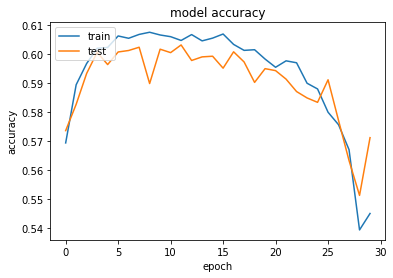

In [193]:
plt.plot(fit_lr_history.history['accuracy'])
plt.plot(fit_lr_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'Finding the ideal Learning Rate')

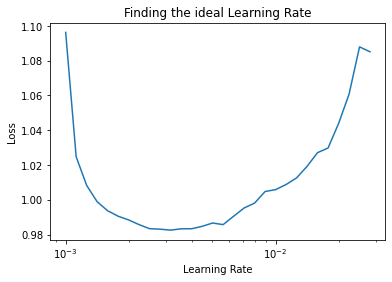

In [194]:
import matplotlib.pyplot as plt

lrs =1e-3 *(10**(tf.range(num_epochs)/20))
plt.semilogx(lrs,fit_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal Learning Rate")

[[7096    0  528 1130    0    0    0]
 [ 335    0  224  611    0    0    0]
 [ 596    0  674 1665    0    0    0]
 [ 316    0  473 2345    0    0    0]
 [ 167    0  256 1231    0    0    0]
 [   5    0    2    5    0    0    0]
 [  22    0    9   17    0    0    0]]


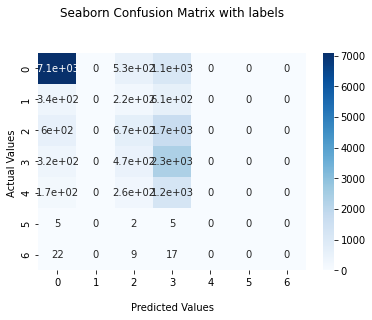

In [195]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)
#y_pred
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['False','True'])
#ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

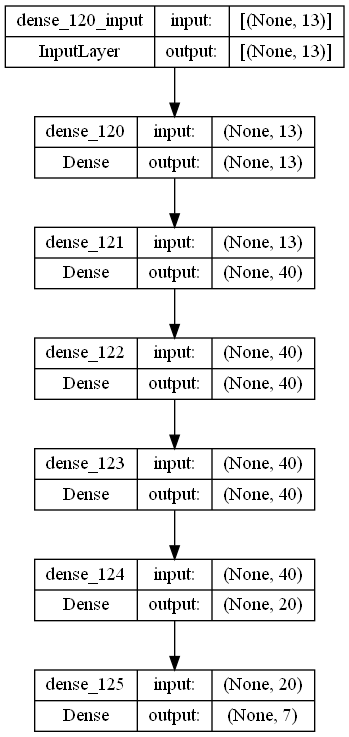

In [196]:
from tensorflow.keras.utils import plot_model
#see the inputs and outputs
plot_model(model_12,show_shapes=True)